In [13]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns; sns.set_theme()
import plotly as py
import plotly.offline as pyo
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
import plotly.graph_objs as go
import plotly.express as px
import plotly.io as pio
init_notebook_mode(connected=True)
%matplotlib inline 

In [14]:
df = pd.read_excel('Election_Vulnerability_Index_downloadable_data 1.28.22.xlsx', sheet_name = 1, header=2)
df

,Country/Territory,Region,Election Type,"Election Month, Year",A1,A2,A3,A4,A5,A6,...,C2,C3,C4,C5,C6,C7,C8,C9,C,Total
0,Albania,Europe,Parliamentary,"April, 2021",4,2,2,4,2,2,...,4,4,3,2,2,2,3,4,26,68
1,Angola,SSA,General,"August, 2022",3,4,4,3,1,3,...,2,2,2,1,1,1,2,4,16,46
2,Argentina,Americas,Legislative,"October, 2021",4,3,2,3,2,3,...,4,4,4,2,3,2,3,4,29,80
3,Bulgaria,Europe,Parliamentary,"April, 2021",4,4,2,2,2,2,...,4,4,4,3,2,3,2,4,28,76
4,Burkina Faso,SSA,General,"November, 2020",4,4,4,4,2,2,...,3,3,2,2,2,0,2,4,20,65
5,Chad,SSA,Presidential,"April, 2021",2,2,2,2,2,2,...,2,1,1,0,1,0,0,4,10,30
6,Chile,Americas,General,"November, 2021",4,4,2,4,2,4,...,4,3,4,4,4,2,3,4,32,91
7,Colombia,Americas,Presidential,"May, 2022",4,3,2,3,2,3,...,3,2,2,3,2,2,2,4,22,66
8,Costa Rica,Americas,General,"February, 2022",4,4,3,3,3,4,...,4,4,4,4,3,3,3,4,33,91
9,Cote d'Ivoire,SSA,Presidential,"October, 2020",2,2,2,2,2,2,...,3,2,3,1,1,2,2,4,20,54


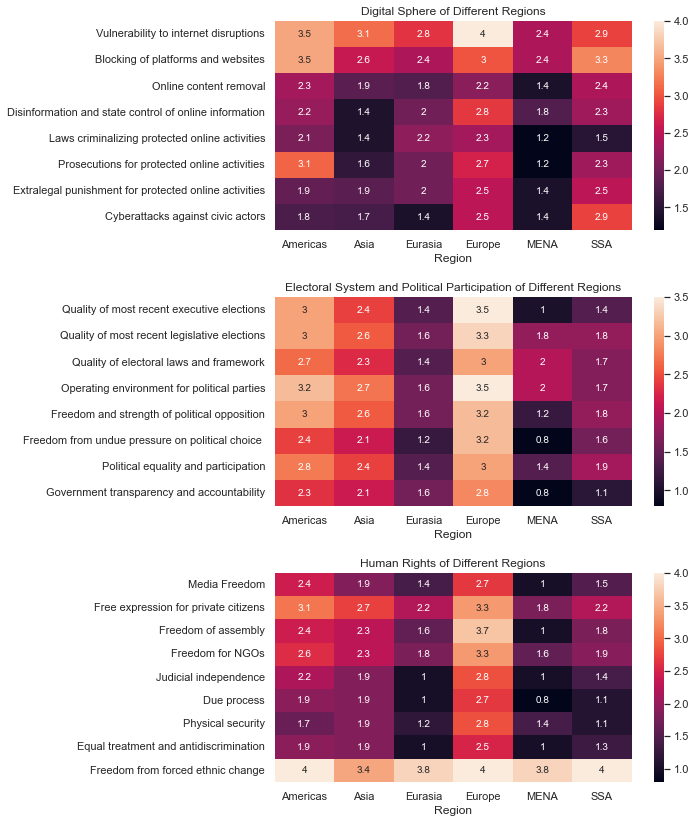

In [15]:
fig = plt.figure(figsize=(8, 11.5))
subfigs = fig.subfigures(3, 1)

axsLeft = subfigs[0].subplots(1, 1, sharey=True)

data = df.groupby(['Region']).mean()
y_axis_labels = ['Vulnerability to internet disruptions','Blocking of platforms and websites', "Online content removal",
                'Disinformation and state control of online information', 'Laws criminalizing protected online activities',
                'Prosecutions for protected online activities', 'Extralegal punishment for protected online activities',
                'Cyberattacks against civic actors']
data = data[['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8']]
data
ax = sns.heatmap(data.transpose(), annot=True, yticklabels=y_axis_labels)
ax.set_title('Digital Sphere of Different Regions')


axsLeft = subfigs[1].subplots(1, 1, sharey=True)
data = df.groupby(['Region']).mean()
y_axis_labels = ['Quality of most recent executive elections','Quality of most recent legislative elections', "Quality of electoral laws and framework",
                'Operating environment for political parties', 'Freedom and strength of political opposition',
                'Freedom from undue pressure on political choice ', 'Political equality and participation',
                'Government transparency and accountability']
data = data[['B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8']]
data
ax = sns.heatmap(data.transpose(),annot=True,  yticklabels=y_axis_labels)
ax.set_title('Electoral System and Political Participation of Different Regions')


axsLeft = subfigs[2].subplots(1, 1, sharey=True)
data = df.groupby(['Region']).mean()
y_axis_labels = ['Media Freedom','Free expression for private citizens', "Freedom of assembly",
                'Freedom for NGOs', 'Judicial independence',
                'Due process', 'Physical security',
                'Equal treatment and antidiscrimination','Freedom from forced ethnic change']
data = data[['C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9']]
data
ax = sns.heatmap(data.transpose(),annot=True,  yticklabels=y_axis_labels)
ax.set_title('Human Rights of Different Regions')
plt.subplots_adjust(bottom=0.123)
plt.show()

In [16]:
layout = dict(geo={'scope':'world'})

In [17]:
data = dict(
type = 'choropleth',
colorscale = 'Jet',
locations = df['Country/Territory'],
locationmode = "country names",
z = df['Total'],
text = df['Country/Territory'],
colorbar = {'title' : 'Total Score'},
)
layout = dict(title = 'Total Score', geo={'scope':'world', 'showframe':True})
chmap = go.Figure(data = [data],layout = layout )
pyo.iplot(chmap)

In [18]:
fig = px.choropleth(locations=df['Country/Territory'],
 locationmode="country names",
color=df['Election Type'],
 title="Wide-Form Input, relabelled",
labels={"color": "Election Type"}
 )
fig.show()
